# Final Exam Assignment 2022/23

**Universitas Gadjah Mada**

Fakultas Teknik

Departemen Teknik Elektro dan Teknologi Informasi

---
Course: TKE215201 Special Topic in Electrical Engineering 

Topic: Image Processing

Instructor: Prof. Johan Debayle, FIET, FIACSIT, FISAC, FETDIS, SMIEEE

Student: Ubai

NIM: 20/463263/TK/51255

Program: Electrical Engineering Undergraduate

Assignment:
Implement one of image segmentation method into biomedical image data in Python Notebook (.ipynb), including code and any text explanation or report needed for grading.

## Description

Object Images: Sagital MRI view of a human anterior cruciate ligament (ACL)

Image Segmentation Method: Canny Detection 

Objective: Able to differentiate the characteristics between Normal, Partial Torn, and Completely Torn anterior cruciate ligament (ACL) using Image Segmentation.

## Background

Image segmentation is a process of dividing and assigning every element of digital image into partition of image segments called regions or objects. The objective of segmentation is to represent the image as something easier to process, analyze, and learn in digital image processing or computer vision. Image segmentation is used to detect lines, curves, and boundaries in image to create regions. For each region, the elements of pixel are assumed to share the same characteristics, thus are labeled as the same. The characteristics or computed defined property could be intensity, colors, texture of each pixel in a region.  Regions in image are significantly different with respect to their neighboring regions. The resulting segmentation consists of a set of segments or contours that will collectively cover the entire original image. 

Image segmentation techniques divides into two classes:
*	Classic Computer vision approaches *(the one which will be used in this assignment)*
*	AI based approaches such as Deep Learning

Then, we can broadly divide image segmentation techniques into two types:

*	**Semantic segmentation** is an approach detecting every pixel belongs to 
a particular class. For example, when all people in a figure are segmented as one object and background as one object.
*	**Instance segmentation** is an approach that identifies every pixel to a belonging instance of the object. It detects each distinct object of interest in the image. For example, when each person in a figure is segmented as an individual object.
*	**Panoptic segmentation** combines semantic and instance segmentation. Like semantic segmentation, panoptic segmentation is an approach that identifies, for every pixel, the belonging class. Unlike semantic segmentation, panoptic segmentation distinguishes different instances of the same class.

Most of the segmentation algorithms are based on discontinuity and similarity. In the ﬁrst category, the approach is by partitioning an image into regions based on abrupt changes in intensity, such as edges. 

The second category is based on partitioning an image into regions that are similar according to a set of predeﬁned criteria. Methods that fall into this category are thresholding, region growing, region splitting, and merging. Increase in performance of segmentation can be gained by combining methods from those two distinct categories.


## Material and Method

### Material
Anterior cruciate ligament (ACL) is an important stabilizing ligament of the knee that connects the femur to the tibia. In the knee, there are four primary ligaments: two ligaments inside the knee are anterior cruciate ligament (ACL), posterior cruciate ligament (PCL) while two outside ligaments are lateral collateral ligament (LCL), medial collateral ligament (MCL). 

The anterior cruciate ligament (ACL) is the most commonly disrupted ligament of the knee, especially in athletes who participate in sports that involve rapid starting, stopping, and pivoting, such as football. Recently happened to France national team's left-back Lucas Hernandez during 2022 World Cup in Qatar, who ruptured his ACL. Although this type of knee injury is typical for athletes, it can happen to anyone.

ACL injury is usually determined by performing a magnetic resonance (MR)
scan of a knee joint and then visually inspecting the scan. This
analysis determines the level of injury, i.e. whether the rupture is complete, partial (or strained) or the ACL is not injured at all. MRI is the best choice for diagnosing ACL tears as ACL is not visible as a plain file X-ray.

In this image segmentation, we use sagittal-plane view magnetic resonance (MR) imaging of human knees. There are three different images used, consists of:

1.   Normal ACL (Case courtesy of Andrew Dixon, Radiopaedia.org, rID: 22993)
2.   Partial tear ACL (Case courtesy of Hani Makky Al Salam, Radiopaedia.org, rID: 10536)
3.   Completely tear ACL (Case courtesy of Hani Makky Al Salam, Radiopaedia.org, rID: 12329)










In [114]:
# Loading required libraries
import numpy as np #for scientific computing
import matplotlib.pyplot as plt  #for plotting image
import cv2 #contains computer vision library

# Import images from author cloud drive 
!gdown 11TwsG3Kf8b8SA19lTVePztUXFqrXdqbf
!gdown 1d0tYFntNZXqMd0eIOFxFghhwltF8b7BN
!gdown 12t3rgzyxHmmfw-Y1G_4R1sXy7OG45Mtx

from PIL import Image
acl_normal = Image.open("../content/normal_acl.jpg")
acl_partial = Image.open("../content/partialtorn_acl.jpg")
acl_complete = Image.open("../content/completetorn_acl.jpg")

Downloading...
From: https://drive.google.com/uc?id=11TwsG3Kf8b8SA19lTVePztUXFqrXdqbf
To: /content/normal_acl.jpg
100% 229k/229k [00:00<00:00, 72.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1d0tYFntNZXqMd0eIOFxFghhwltF8b7BN
To: /content/partialtorn_acl.jpg
100% 111k/111k [00:00<00:00, 55.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12t3rgzyxHmmfw-Y1G_4R1sXy7OG45Mtx
To: /content/completetorn_acl.jpg
100% 119k/119k [00:00<00:00, 63.7MB/s]


MRI Knee - Sagittal T1 - Normal ACL
* The normal anterior cruciate ligament (ACL) is slightly obliquely orientated (superolateral to inferomedial)
* Sagittal plane MRIs of the knee are angled to optimise views of the ACL
* On a T1 sagittal image the ACL should appear well-defined and black, as in this image

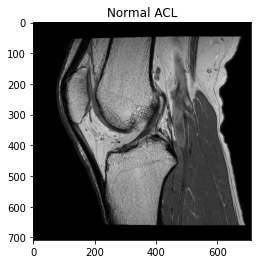

In [28]:
# Plot Images
plt.imshow(acl_normal)
plt.title("Normal ACL")
plt.show()

MRI Knee - Sagittal T1 - Partial Torn ACL
* The ACL fibre strands ruptures but not completely teared

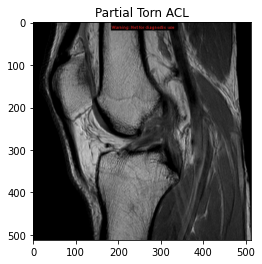

In [29]:
#Plot Images
plt.imshow(acl_partial)
plt.title("Partial Torn ACL")
plt.show()

MRI Knee - Sagittal T1 - ACL complete tear
* The ACL is not visible
* Its fibres – normally black – are replaced by strands of high signal representing oedema within the torn ligament

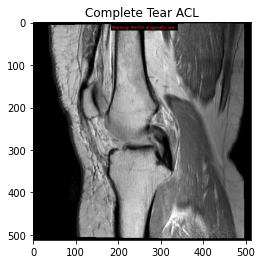

In [30]:
#Plot Images
plt.imshow(acl_complete)
plt.title("Complete Tear ACL")
plt.show()

### Method
Image segmentation method used for this test is the segmentation based on Canny edge detection. The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.

And the Canny Edge Detection Algorithm is the most commonly used algorithm for the edge detection objects.

The process of Canny edge detection algorithm can be broken down to five different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4.  Apply double threshold to determine potential edges
5.  Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

For the first step, we use getGaussiankernel to find kernel value for our images, then use filter2D function using kernel value computed before. All this function uses openCV library

In [115]:
#Load images
img1 = plt.imread('../content/normal_acl.jpg')
img2 = plt.imread('../content/partialtorn_acl.jpg')
img3 = plt.imread('../content/completetorn_acl.jpg')

#Define kernel of the gaussian filter
kernel = cv2.getGaussianKernel(11, 2)
kernel = kernel.dot(kernel.T)

#Gaussian filter
img1_gaussian = cv2.filter2D(img1, -1, kernel)
img2_gaussian = cv2.filter2D(img2, -1, kernel)
img3_gaussian = cv2.filter2D(img3, -1, kernel)

The rest of the steps of Canny Detector can be loaded using Canny function already provided by openCV through cv2. All we need to do is define the threshold value. The upper value used is 50 and the lower value used is 100

In [116]:
#Canny edge detection
threshold1 = 50
threshold2 = 100
img1_canny = cv2.Canny(img1_gaussian, threshold1, threshold2)
img2_canny = cv2.Canny(img2_gaussian, threshold1, threshold2)
img3_canny = cv2.Canny(img3_gaussian, threshold1, threshold2)

<Figure size 432x288 with 0 Axes>

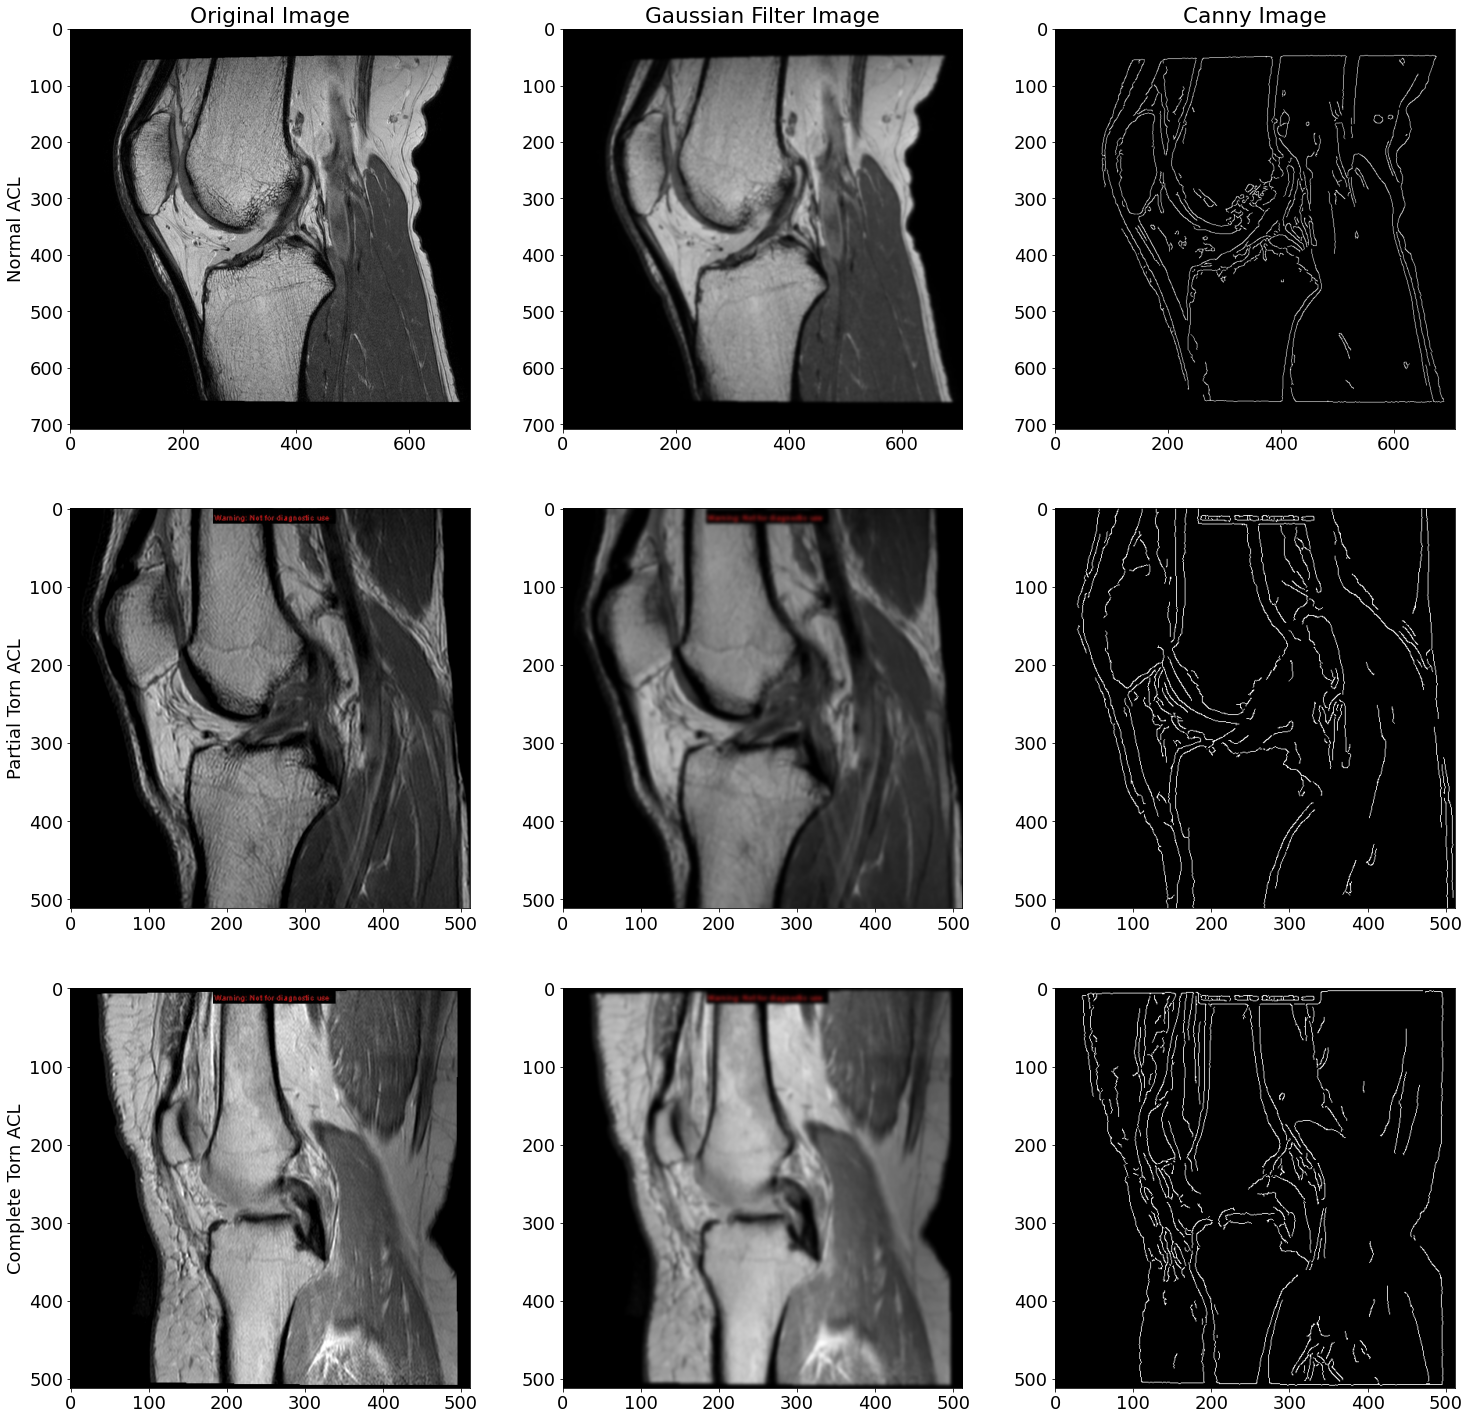

In [117]:
#Plot the results
plt.figure(1)
plt.figure(figsize=(25,25))
plt.rcParams['font.size'] = '18'

plt.subplot(331)
plt.imshow(img1)
plt.title("Original Image")
plt.ylabel('Normal ACL')


plt.subplot(332)
plt.imshow(img1_gaussian)
plt.title("Gaussian Filter Image")

plt.subplot(333)
plt.imshow(img1_canny, cmap="gray")
plt.title("Canny Image")

plt.subplot(334)
plt.imshow(img2)
plt.ylabel('Partial Torn ACL')

plt.subplot(335)
plt.imshow(img2_gaussian)

plt.subplot(336)
plt.imshow(img2_canny, cmap="gray")

plt.subplot(337)
plt.imshow(img3)
plt.ylabel('Complete Torn ACL')

plt.subplot(338)
plt.imshow(img3_gaussian)

plt.subplot(339)
plt.imshow(img3_canny, cmap="gray")

plt.show()

Plot above compares all nine images of original, blurred, and segmented as the result of Canny Detection

## Result

<Figure size 432x288 with 0 Axes>

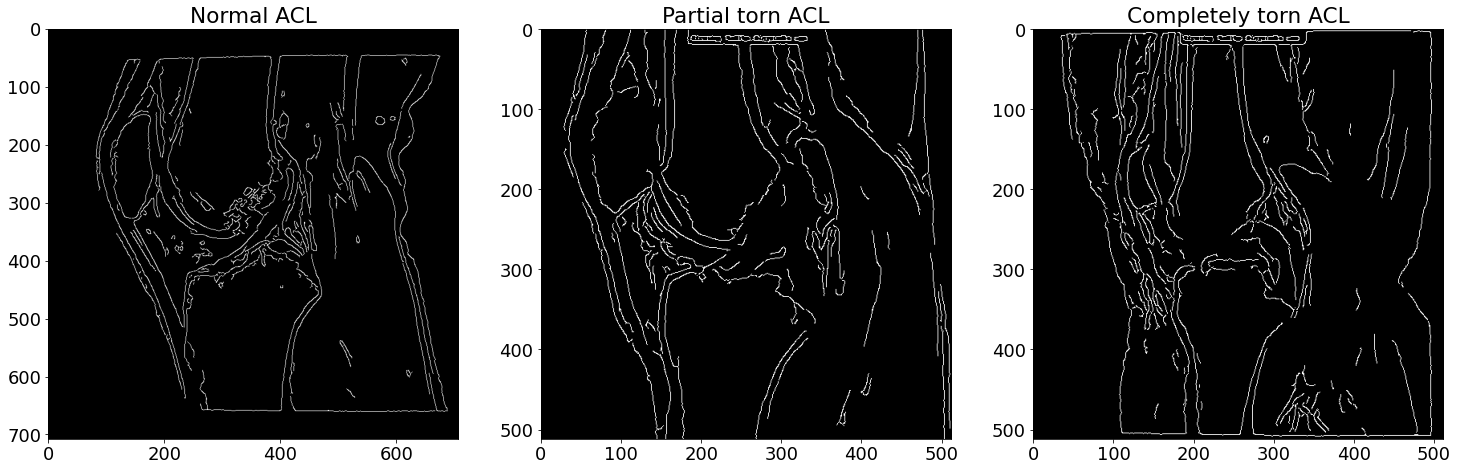

In [118]:
plt.figure(1)
plt.figure(figsize=(25,25))
plt.rcParams['font.size'] = '18'

plt.subplot(131)
plt.title('Normal ACL')
plt.imshow(img1_canny, cmap="gray")

plt.subplot(132)
plt.title('Partial torn ACL')
plt.imshow(img2_canny, cmap="gray")

plt.subplot(133)
plt.title('Completely torn ACL')
plt.imshow(img3_canny, cmap="gray")

The presence of Gaussian filters out any noise in an picture by smoothing it, therefore the extraction of Canny Edge contains lesser noise and show edge in much more clarity. The optimal setting for Canny depends on the threshold and paramter computed with respect to corresponding image.

Our region of interest located on the middle of image, i.e. the region between tibia and femur. The first picture of the normal ACL clearly detect a clear edge connecting both bone, as depicted with thin straight but not strained edge. The second picture, which is the partial ruptured ACL, shows that there still edge detected, but not as sharp as the normal ACL, therefore shows that the ACL is still connected but strained, shown that it is stretched. The last picture, which is a completely teared ACL doesn't even detected an edge connecting the bone, therefore it is concluded that the ACL is completely teared. We even could observe PCL much clearly because the ACL intensity on the MRI is not high anymore.


## References and Resources

1. *https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/*

2. *https://www.radiologymasterclass.co.uk/gallery/imaging-galleries/mri-gallery/mri-knee-acl-tear#top_1st_img*

3. *I. Štajduhar, M. Mamula, D. Miletić, G. Unal, Semi-automated detection of anterior cruciate ligament injury from MRI, Computer Methods and Programs in Biomedicine, Volume 140, 2017, Pages 151–164.*

4. *Awan MJ, Rahim MSM, Salim N, Mohammed MA, Garcia-Zapirain B, Abdulkareem KH. Efficient Detection of Knee Anterior Cruciate Ligament from Magnetic Resonance Imaging Using Deep Learning Approach. Diagnostics (Basel). 2021 Jan 11;11(1):105. doi: 10.3390/diagnostics11010105. PMID: 33440798; PMCID: PMC7826961.*

5. *Goel A, Tang W, Roberts D, et al. Anterior cruciate ligament. Reference article, Radiopaedia.org (Accessed on 22 Dec 2022) https://doi.org/10.53347/rID-23201*

6. *Radswiki T, Vadera S, Baba Y, et al. Anterior cruciate ligament tear. Reference article, Radiopaedia.org (Accessed on 22 Dec 2022) https://doi.org/10.53347/rID-12490*

7. *https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html*

8. *https://medium.com/@ceng.mavuzer/canny-edge-detection-algorithm-with-python-17ac62c61d2e*
